In [4]:
%autosave 60
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Model,Sequential, load_model
from keras.layers import Dense,Activation,Dropout, Flatten
from keras.layers import Input,Conv2D, MaxPooling2D,BatchNormalization
from keras.utils import multi_gpu_model
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.losses import softmax_cross_entropy

Autosaving every 60 seconds


### CNN model with 6 conv layers, BN and lr=0.0001

In [7]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
# Convert classification labels to binary class matrices.
y_train = keras.utils.to_categorical(y_train, number_of_class)
y_test = keras.utils.to_categorical(y_test, number_of_class)


model = Sequential()
# kernel_size:(3,3)->specify the height and width of the 2D convolution window
#"SAME": output size is the same as input size. 
#This requires the filter window to slip outside input map(need to pad)
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#Flatten the input. Do not affect the batch size.
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation('softmax'))

# decay: Learning rate decay over each update
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

#model = multi_gpu_model(model, gpus=2)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

fit_model=model.fit(x_train, y_train,
                    batch_size=64,epochs=40,verbose=1,
                    validation_split=0.10)
model.save('cifar-10')
performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])


Train on 45000 samples, validate on 5000 samples
Epoch 1/40
  512/45000 [..............................] - ETA: 17s - loss: 4.0046 - acc: 0.1602

/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


45000/45000 [==============================] - 10s 220us/step - loss: 1.9427 - acc: 0.3913 - val_loss: 1.3631 - val_acc: 0.5184
Epoch 2/40
45000/45000 [==============================] - 21s 475us/step - loss: 1.2054 - acc: 0.5833 - val_loss: 0.9767 - val_acc: 0.6578
Epoch 3/40
45000/45000 [==============================] - 60s 1ms/step - loss: 0.9362 - acc: 0.6800 - val_loss: 0.8129 - val_acc: 0.7172
Epoch 4/40
45000/45000 [==============================] - 60s 1ms/step - loss: 0.7810 - acc: 0.7326 - val_loss: 0.7219 - val_acc: 0.7590
Epoch 5/40
45000/45000 [==============================] - 36s 808us/step - loss: 0.6866 - acc: 0.7673 - val_loss: 0.6459 - val_acc: 0.7788
Epoch 6/40
45000/45000 [==============================] - 60s 1ms/step - loss: 0.6135 - acc: 0.7912 - val_loss: 0.6479 - val_acc: 0.7844
Epoch 7/40
45000/45000 [==============================] - 60s 1ms/step - loss: 0.5566 - acc: 0.8126 - val_loss: 0.5673 - val_acc: 0.8132
Epoch 8/40
45000/45000 [======================

### CNN model with 6 conv layers, BN and lr=0.001

In [10]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
# Convert classification labels to binary class matrices.
y_train = keras.utils.to_categorical(y_train, number_of_class)
y_test = keras.utils.to_categorical(y_test, number_of_class)


model = Sequential()
# kernel_size:(3,3)->specify the height and width of the 2D convolution window
#"SAME": output size is the same as input size. 
#This requires the filter window to slip outside input map(need to pad)
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#Flatten the input. Do not affect the batch size.
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation('softmax'))

# decay: Learning rate decay over each update
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

#model = multi_gpu_model(model, gpus=2)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

fit_model=model.fit(x_train, y_train,
                    batch_size=64,epochs=20,verbose=1,
                    validation_split=0.10)
model.save('cifar-10')
performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
  576/45000 [..............................] - ETA: 16s - loss: 4.4437 - acc: 0.1441

/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


45000/45000 [==============================] - 10s 223us/step - loss: 1.8009 - acc: 0.4068 - val_loss: 2.2645 - val_acc: 0.3988
Epoch 2/20
45000/45000 [==============================] - 10s 227us/step - loss: 1.1477 - acc: 0.6063 - val_loss: 1.4971 - val_acc: 0.5450
Epoch 3/20
45000/45000 [==============================] - 10s 232us/step - loss: 0.9738 - acc: 0.6764 - val_loss: 1.4589 - val_acc: 0.4896
Epoch 4/20
45000/45000 [==============================] - 10s 230us/step - loss: 0.8752 - acc: 0.7147 - val_loss: 1.1123 - val_acc: 0.6424
Epoch 5/20
45000/45000 [==============================] - 10s 229us/step - loss: 0.8127 - acc: 0.7385 - val_loss: 1.1001 - val_acc: 0.6472
Epoch 6/20
45000/45000 [==============================] - 10s 229us/step - loss: 0.7656 - acc: 0.7578 - val_loss: 1.3423 - val_acc: 0.6882
Epoch 7/20
45000/45000 [==============================] - 10s 228us/step - loss: 0.7347 - acc: 0.7717 - val_loss: 1.5000 - val_acc: 0.6136
Epoch 8/20
45000/45000 [==============

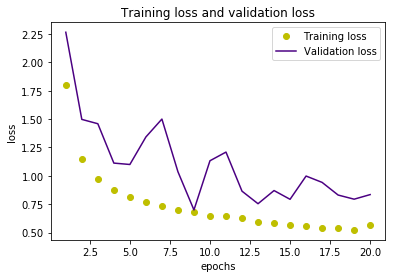

In [11]:
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'indigo', label='Validation loss')
plt.title('Training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

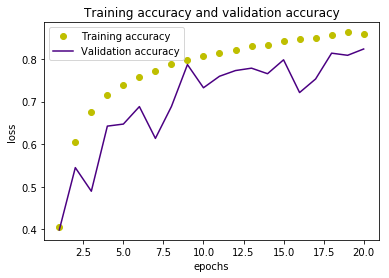

In [12]:
plt.clf()
acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
plt.plot(epochs, acc, 'yo', label='Training accuracy')
plt.plot(epochs, val_acc, 'indigo', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
# Convert classification labels to binary class matrices.
y_train = keras.utils.to_categorical(y_train, number_of_class)
y_test = keras.utils.to_categorical(y_test, number_of_class)


model = Sequential()
# kernel_size:(3,3)->specify the height and width of the 2D convolution window
#"SAME": output size is the same as input size. 
#This requires the filter window to slip outside input map(need to pad)
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#Flatten the input. Do not affect the batch size.
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation('softmax'))

# decay: Learning rate decay over each update
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

#model = multi_gpu_model(model, gpus=2)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

fit_model=model.fit(x_train, y_train,
                    batch_size=64,epochs=40,verbose=1,
                    validation_split=0.10)
model.save('cifar-10')
performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])


Train on 45000 samples, validate on 5000 samples
Epoch 1/40
45000/45000 [==============================] - 98s 2ms/step - loss: 1.9872 - acc: 0.2530 - val_loss: 1.9594 - val_acc: 0.3036
Epoch 2/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.6617 - acc: 0.3866 - val_loss: 1.5403 - val_acc: 0.4302
Epoch 3/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.4912 - acc: 0.4536 - val_loss: 1.5711 - val_acc: 0.4346
Epoch 4/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.3729 - acc: 0.5040 - val_loss: 1.5318 - val_acc: 0.4762
Epoch 5/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.2632 - acc: 0.5466 - val_loss: 1.1971 - val_acc: 0.5666
Epoch 6/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.1806 - acc: 0.5782 - val_loss: 1.1650 - val_acc: 0.5782
Epoch 7/40
45000/45000 [==============================] - 97s 2ms/step - loss: 1.1144 - acc: 0.6061 - val_loss: 1.1372 - val_acc:

In [ ]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
# Convert classification labels to binary class matrices.
y_train = keras.utils.to_categorical(y_train, number_of_class)
y_test = keras.utils.to_categorical(y_test, number_of_class)

# use the resnet trained on Imagenet 
model_resnet50_conv = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)

model = Sequential()
model.add(model_resnet50_conv)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation='softmax'))

print('The number of trainable weights before frozen:', len(model.trainable_weights))
# avoid the weights from pretrained model are modified during training 
model_resnet50_conv.trainable = False
print('The number of trainable weights after frozen:', len(model.trainable_weights))

#model = multi_gpu_model(model, gpus=2)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['accuracy'])

fit_model=model.fit(x_train, y_train,
                    batch_size=32,epochs=200,verbose=1,
                    validation_split=0.10)

performance = model.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


The number of trainable weights before frozen: 216
The number of trainable weights after frozen: 4
Train on 45000 samples, validate on 5000 samples
Epoch 1/200
45000/45000 [==============================] - 127s 3ms/step - loss: 2.7616 - acc: 0.2037 - val_loss: 2.9183 - val_acc: 0.1240
Epoch 2/200
45000/45000 [==============================] - 123s 3ms/step - loss: 2.1380 - acc: 0.2920 - val_loss: 3.0783 - val_acc: 0.1102
Epoch 3/200
45000/45000 [==============================] - 123s 3ms/step - loss: 1.9519 - acc: 0.3300 - val_loss: 3.2233 - val_acc: 0.1090
Epoch 4/200
45000/45000 [==============================] - 124s 3ms/step - loss: 1.8477 - acc: 0.3561 - val_loss: 3.3115 - val_acc: 0.0978
Epoch 5/200
45000/45000 [==============================] - 123s 3ms/step - loss: 1.7989 - acc: 0.3698 - val_loss: 3.4414 - val_acc: 0.0964
Epoch 6/200
45000/45000 [==============================] - 123s 3ms/step - loss: 1.7510 - acc: 0.3856 - val_loss: 3.6260 - val_acc: 0.0958
Epoch 7/200
45000/

45000/45000 [==============================] - 120s 3ms/step - loss: 1.3398 - acc: 0.5258 - val_loss: 6.8390 - val_acc: 0.0986
Epoch 117/200
45000/45000 [==============================] - 121s 3ms/step - loss: 1.3328 - acc: 0.5330 - val_loss: 6.9279 - val_acc: 0.0986
Epoch 118/200
45000/45000 [==============================] - 121s 3ms/step - loss: 1.3378 - acc: 0.5282 - val_loss: 6.9374 - val_acc: 0.0986
Epoch 119/200
45000/45000 [==============================] - 121s 3ms/step - loss: 1.3365 - acc: 0.5285 - val_loss: 6.9015 - val_acc: 0.0986
Epoch 120/200
45000/45000 [==============================] - 120s 3ms/step - loss: 1.3297 - acc: 0.5340 - val_loss: 6.9843 - val_acc: 0.0986
Epoch 121/200
45000/45000 [==============================] - 121s 3ms/step - loss: 1.3270 - acc: 0.5284 - val_loss: 6.9596 - val_acc: 0.0986
Epoch 122/200
45000/45000 [==============================] - 121s 3ms/step - loss: 1.3284 - acc: 0.5338 - val_loss: 6.9759 - val_acc: 0.0986
Epoch 123/200
45000/45000 [

In [4]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
# Convert classification labels to binary class matrices.
y_train = keras.utils.to_categorical(y_train, number_of_class)
y_test = keras.utils.to_categorical(y_test, number_of_class)

# use the resnet trained on Imagenet 
model_vgg16_conv = VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)

model_vgg = Sequential()
model_vgg.add(model_vgg16_conv)
model_vgg.add(Flatten())
model_vgg.add(Dense(1024,activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(number_of_class,activation='softmax'))

print('The number of trainable weights before frozen:', len(model_vgg.trainable_weights))
# avoid the weights from pretrained model are modified during training 
model_vgg16_conv.trainable = False
print('The number of trainable weights after frozen:', len(model_vgg.trainable_weights))

#model = multi_gpu_model(model, gpus=2)
model_vgg.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

fit_model=model_vgg.fit(x_train, y_train,
                    batch_size=32,epochs=20,verbose=1,
                    validation_split=0.10)

performance = model_vgg.evaluate(x_test, y_test, verbose=0)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

The number of trainable weights before frozen: 30
The number of trainable weights after frozen: 4
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 92s 2ms/step - loss: 1.6670 - acc: 0.4158 - val_loss: 1.3765 - val_acc: 0.5302
Epoch 2/20
45000/45000 [==============================] - 91s 2ms/step - loss: 1.3898 - acc: 0.5161 - val_loss: 1.2814 - val_acc: 0.5574
Epoch 3/20
45000/45000 [==============================] - 91s 2ms/step - loss: 1.3111 - acc: 0.5444 - val_loss: 1.2324 - val_acc: 0.5704
Epoch 4/20
45000/45000 [==============================] - 91s 2ms/step - loss: 1.2623 - acc: 0.5619 - val_loss: 1.2009 - val_acc: 0.5812
Epoch 5/20
45000/45000 [==============================] - 91s 2ms/step - loss: 1.2280 - acc: 0.5747 - val_loss: 1.1729 - val_acc: 0.5874
Epoch 6/20
45000/45000 [==============================] - 91s 2ms/step - loss: 1.1993 - acc: 0.5859 - val_loss: 1.1604 - val_acc: 0.5944
Epoch 7/20
45000/45000 [=======